<a href="https://colab.research.google.com/github/aplneto/IF1014/blob/main/Tipos_de_dados_e_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python3 -m pip install scikit-plot

In [ ]:
'''
Antônio Paulino - apln2@cin.ufpe.br

Realizar as atividades de compreensão do problema, dos dados e a análise
exploratória para o domínio Credit Approval Data Set
(https://archive.ics.uci.edu/ml/datasets/Credit+Approval).
Apresentar relatórios com o itens mencionados e discussões com gráficos da base
de dados.
'''

DATA_FOLDER = (
    'https://archive.ics.uci.edu/ml/machine-learning-databases/'
    'credit-screening/'
)

DATA_DESCRIPTION = DATA_FOLDER + 'crx.names'
DATA_SET = DATA_FOLDER + 'crx.data'

In [ ]:
import requests

description = requests.get(DATA_DESCRIPTION)
print(description.text)


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

# Entendimento do Problema

* Problema de claissificação (crédito aprovado e reprovado)

In [ ]:
import pandas
import numpy

In [ ]:
aliases = ['A%i' % i for i in range(1, 17)]
data = pandas.read_csv(DATA_SET, names=aliases, na_values='?', header=None)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [ ]:
data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [ ]:
continuous_columns = data.describe().columns
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


count    678.000000
mean      31.568171
std       11.957862
min       13.750000
25%       22.602500
50%       28.460000
75%       38.230000
max       80.250000
Name: A2, dtype: float64
Null values: 12


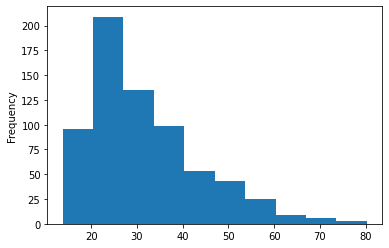

count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: A3, dtype: float64
Null values: 0


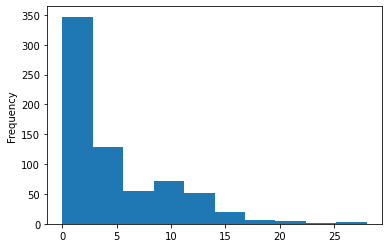

count    690.000000
mean       2.223406
std        3.346513
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: A8, dtype: float64
Null values: 0


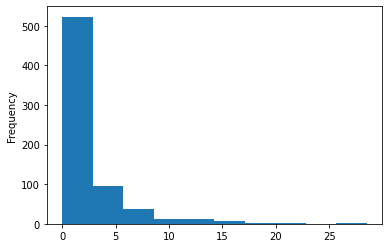

count    690.00000
mean       2.40000
std        4.86294
min        0.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       67.00000
Name: A11, dtype: float64
Null values: 0


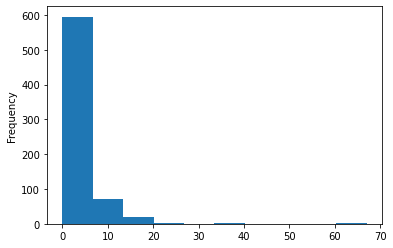

count     677.000000
mean      184.014771
std       173.806768
min         0.000000
25%        75.000000
50%       160.000000
75%       276.000000
max      2000.000000
Name: A14, dtype: float64
Null values: 13


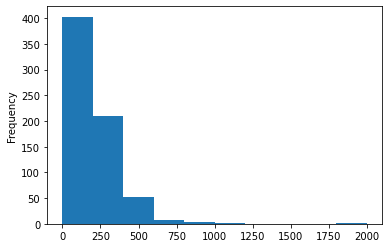

count       690.000000
mean       1017.385507
std        5210.102598
min           0.000000
25%           0.000000
50%           5.000000
75%         395.500000
max      100000.000000
Name: A15, dtype: float64
Null values: 0


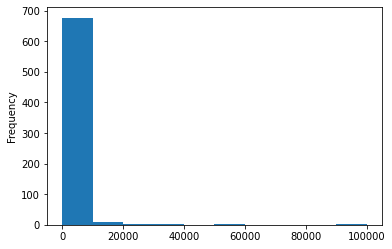

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_continuous_columns(series: pandas.core.series.Series):
  fig = series.plot.hist()
  print(series.describe())
  print('Null values:', series.isnull().sum())
  return fig

for column in continuous_columns:
  fig = plot_continuous_columns(data[column])
  plt.show()

In [ ]:
categorical_columns = [d for d in data.columns if d not in continuous_columns]
data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [ ]:
for column in categorical_columns:
  table = pandas.crosstab(index=data[column], columns='count')
  table = table/table.sum()
  print(table.to_markdown())
  print()

| A1   |    count |
|:-----|---------:|
| a    | 0.309735 |
| b    | 0.690265 |

| A4   |      count |
|:-----|-----------:|
| l    | 0.00292398 |
| u    | 0.758772   |
| y    | 0.238304   |

| A5   |      count |
|:-----|-----------:|
| g    | 0.758772   |
| gg   | 0.00292398 |
| p    | 0.238304   |

| A6   |      count |
|:-----|-----------:|
| aa   | 0.0792952  |
| c    | 0.201175   |
| cc   | 0.0602056  |
| d    | 0.0440529  |
| e    | 0.0367107  |
| ff   | 0.0778267  |
| i    | 0.0866373  |
| j    | 0.0146843  |
| k    | 0.0748899  |
| m    | 0.0558003  |
| q    | 0.114537   |
| r    | 0.00440529 |
| w    | 0.0939794  |
| x    | 0.0558003  |

| A7   |      count |
|:-----|-----------:|
| bb   | 0.0866373  |
| dd   | 0.00881057 |
| ff   | 0.0837004  |
| h    | 0.202643   |
| j    | 0.0117474  |
| n    | 0.00587372 |
| o    | 0.00293686 |
| v    | 0.585903   |
| z    | 0.0117474  |

| A9   |    count |
|:-----|---------:|
| f    | 0.476812 |
| t    | 0.523188 |

| A10   |    count |

| A1   |    count |
|:-----|---------:|
| a    | 0.309735 |
| b    | 0.690265 |

| A4   |      count |
|:-----|-----------:|
| l    | 0.00292398 |
| u    | 0.758772   |
| y    | 0.238304   |

| A5   |      count |
|:-----|-----------:|
| g    | 0.758772   |
| gg   | 0.00292398 |
| p    | 0.238304   |

| A6   |      count |
|:-----|-----------:|
| aa   | 0.0792952  |
| c    | 0.201175   |
| cc   | 0.0602056  |
| d    | 0.0440529  |
| e    | 0.0367107  |
| ff   | 0.0778267  |
| i    | 0.0866373  |
| j    | 0.0146843  |
| k    | 0.0748899  |
| m    | 0.0558003  |
| q    | 0.114537   |
| r    | 0.00440529 |
| w    | 0.0939794  |
| x    | 0.0558003  |

| A7   |      count |
|:-----|-----------:|
| bb   | 0.0866373  |
| dd   | 0.00881057 |
| ff   | 0.0837004  |
| h    | 0.202643   |
| j    | 0.0117474  |
| n    | 0.00587372 |
| o    | 0.00293686 |
| v    | 0.585903   |
| z    | 0.0117474  |

| A9   |    count |
|:-----|---------:|
| f    | 0.476812 |
| t    | 0.523188 |

| A10   |    count |
|:------|---------:|
| f     | 0.572464 |
| t     | 0.427536 |

| A12   |    count |
|:------|---------:|
| f     | 0.542029 |
| t     | 0.457971 |

| A13   |     count |
|:------|----------:|
| g     | 0.905797  |
| p     | 0.0115942 |
| s     | 0.0826087 |

| A16   |    count |
|:------|---------:|
| +     | 0.444928 |
| -     | 0.555072 |

b    468
a    210
Name: A1, dtype: int64
Null values: 12


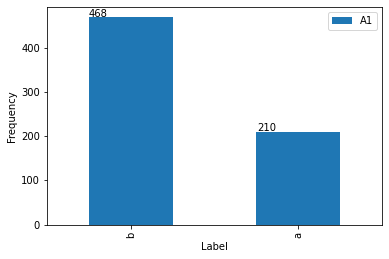

u    519
y    163
l      2
Name: A4, dtype: int64
Null values: 6


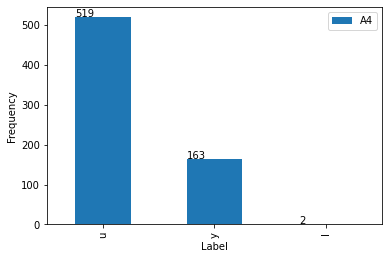

g     519
p     163
gg      2
Name: A5, dtype: int64
Null values: 6


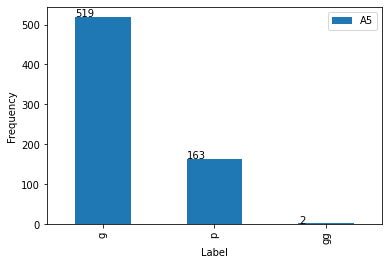

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64
Null values: 9


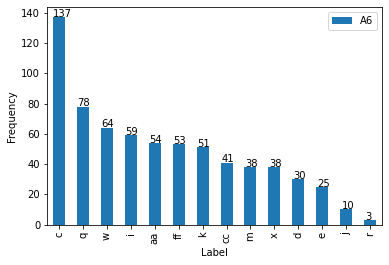

v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64
Null values: 9


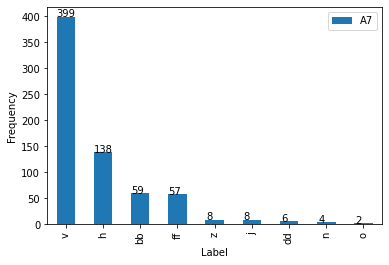

t    361
f    329
Name: A9, dtype: int64
Null values: 0


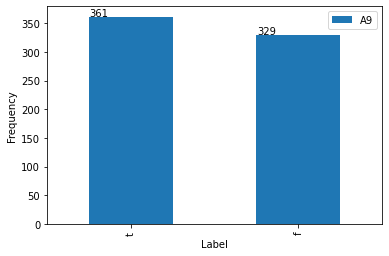

f    395
t    295
Name: A10, dtype: int64
Null values: 0


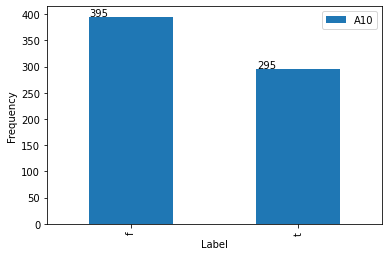

f    374
t    316
Name: A12, dtype: int64
Null values: 0


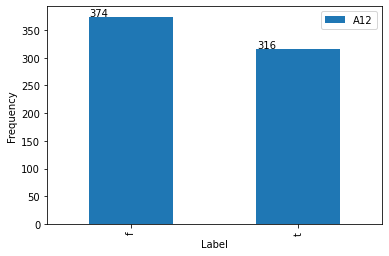

g    625
s     57
p      8
Name: A13, dtype: int64
Null values: 0


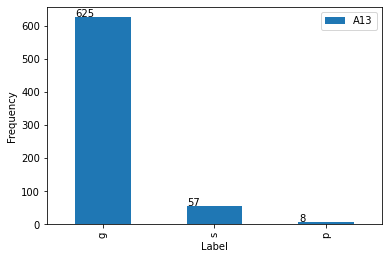

-    383
+    307
Name: A16, dtype: int64
Null values: 0


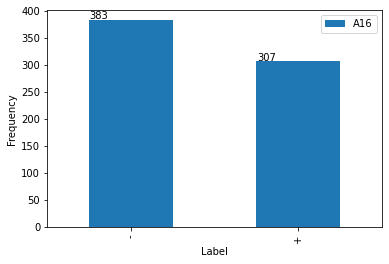

In [ ]:
def plot_categorical_column(series: pandas.core.series.Series):
  fig = series.value_counts().plot(kind='bar')
  fig.legend()
  fig.set_xlabel("Label")
  fig.set_ylabel("Frequency")
  for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
  print(series.value_counts())
  print('Null values:', series.isnull().sum())
  return fig

figures = []
for column in categorical_columns:
  figures.append(plot_categorical_column(data[column]))
  plt.show()

A2
Outliers: 16


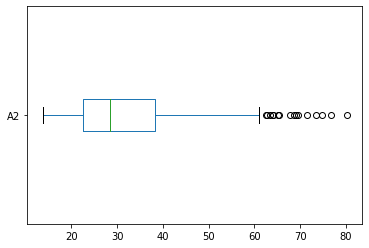

A3
Outliers: 17


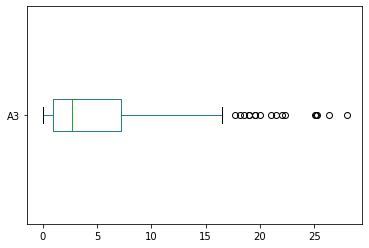

A8
Outliers: 63


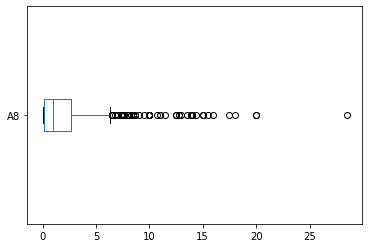

A11
Outliers: 79


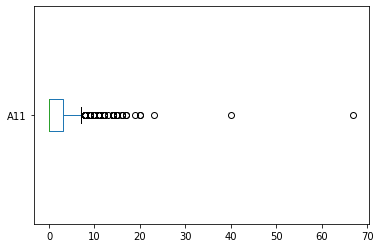

A14
Outliers: 13


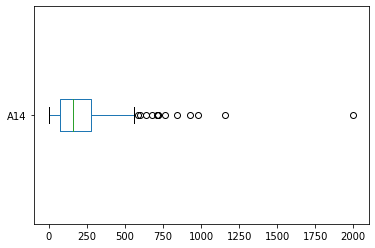

A15
Outliers: 113


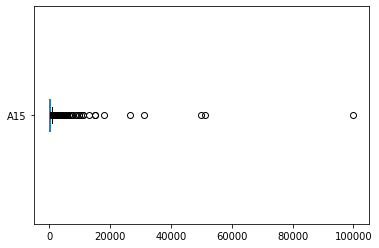

In [ ]:
def box_plot_column(series: pandas.core.series.Series):
  figure = series.plot.box(vert=False)
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()
  print("Outliers: %i" % outliers)
  return figure

for column in continuous_columns:
  print(column)
  fig = box_plot_column(data[column])
  plt.show()

A2


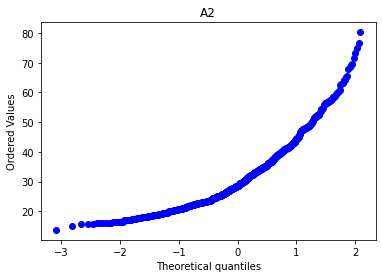

A3


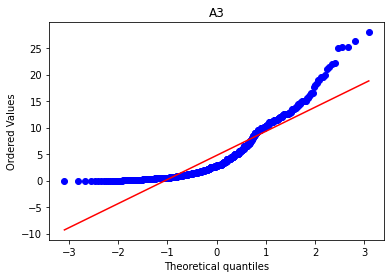

A8


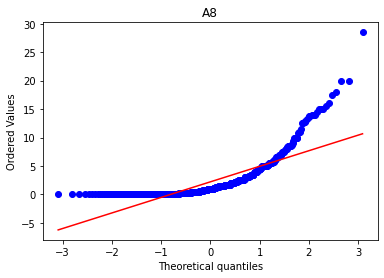

A11


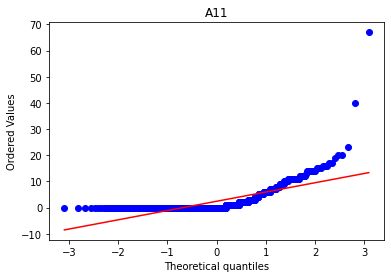

A14


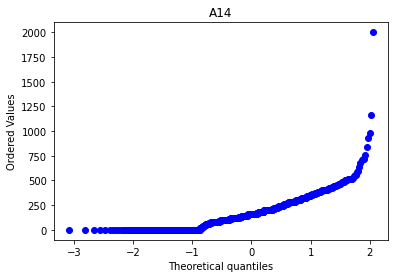

A15


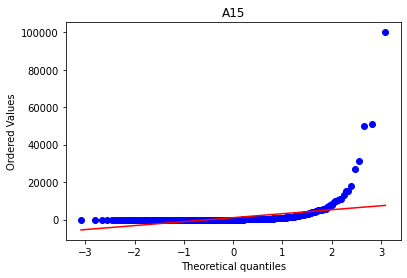

In [ ]:
import pylab
import scipy.stats as stats

def qqplot(series: pandas.core.series.Series, title, distribution='norm'):
  stats.probplot(series, dist=distribution, plot=pylab)
  pylab.title(title)
  pylab.show()

for column in continuous_columns:
  print(column)
  qqplot(data[column], column)

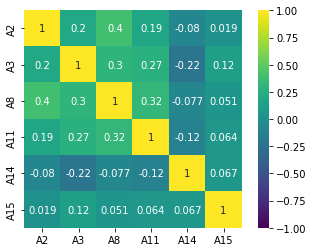

In [ ]:
# Correlation

import seaborn

seaborn.heatmap(data.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, annot=True, square=True)

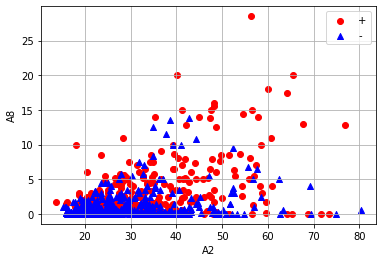

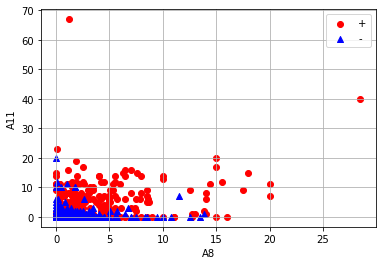

In [ ]:
for i, x in enumerate(continuous_columns):
  for y in continuous_columns[i+1:]:
    corr = data[x].corr(data[y])
    if (corr >= 0.3 or corr <= -0.3):
      fig, ax = plt.subplots()
      appr = data[[x, y]].where(data.A16 == '+')
      disa = data[[x, y]].where(data.A16 == '-')
      ax.scatter(appr[x], appr[y], color='red', marker='o', label='+')
      ax.scatter(disa[x], disa[y], color='blue', marker='^', label='-')
      ax.legend()
      ax.grid(True)
      plt.xlabel(x)
      plt.ylabel(y)
      plt.show()
